In [1]:
import mysql.connector
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

connection_params = {
    'host' : 'localhost',
    'user' : 'root',
    'password' : 'K@wa11',
    'database' : 'pldac'
}

r0 = 'SELECT user_id from users_0401_0415'
r1 = 'SELECT user_id, in_reply_to_user_id, quoted_user_id, retweeted_user_id FROM tweets_0401_0415'
r2 = 'SELECT source_user_id, target_user_id FROM user_mentions_0401_0415'
r3 = 'SELECT user_id FROM tweets_0401_0415 UNION SELECT in_reply_to_user_id FROM tweets_0401_0415 UNION SELECT quoted_user_id FROM tweets_0401_0415 UNION SELECT retweeted_user_id FROM tweets_0401_0415 UNION SELECT source_user_id FROM user_mentions_0401_0415 UNION SELECT target_user_id FROM user_mentions_0401_0415'
r4 = 'SELECT * FROM users_0401_0415'
r5 = 'select t.user_id, h.hash from tweets_0401_0415 as t, tweet_hash_0401_0415 as th, hashs_0401_0415 as h where t.tweet_id = th.tweet_id and th.hash_id = h.hash_id;'

def init():
    G = nx.MultiDiGraph()
    with mysql.connector.connect(**connection_params) as db:
        with db.cursor() as c:
            c.execute(r4)
            result = c.fetchall()
            for node in result:
                G.add_node(int(node[0]), screen_name = node[1], name = node[2], location = node[3], url = node[4], description = node[5], created_at = node[6], followers_count = node[7], friends_count = node[8], statuses_count = node[9], hashs = [])
            c.execute(r1)
            result = c.fetchall()
            for arc in result:
                if arc[1] != None:
                    G.add_edge(arc[0], arc[1], type = 'reply')
                if arc[2] != None:
                    G.add_edge(arc[0], arc[2], type = 'quote')
                if arc[3] != None:
                    G.add_edge(arc[0], arc[3], type = 'retweet')
            c.execute(r2)
            result = c.fetchall()
            for arc in result:
                if arc[1] != None:
                    G.add_edge(arc[0], arc[1], type = 'mention')
            c.execute(r5)
            result = c.fetchall()
            for u in result:
                G.nodes[int(u[0])]['hashs'].append(u[1])
    return G

In [54]:
G = init()

In [42]:
foc = []
frc = []
sc = []
nbex = 0
for n in G.nodes:
    try:
        foc.append(G.nodes[n]['followers_count'])
    except:
        nbex += 1
    try:
        frc.append(G.nodes[n]['friends_count'])
    except:
        nbex += 1
    try:
        sc.append(G.nodes[n]['statuses_count'])
    except:
        nbex += 1


827592


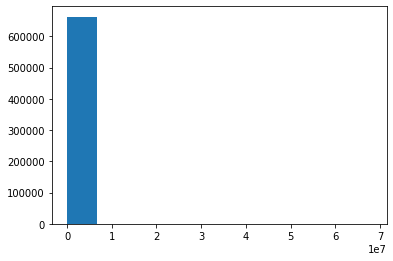

In [43]:
print(nbex)
plt.hist(foc)
plt.show()

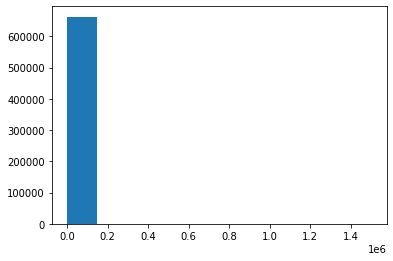

In [44]:
plt.hist(frc)
plt.show()

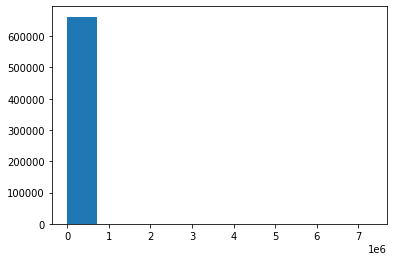

In [45]:
plt.hist(sc)
plt.show()

In [47]:
location = []
for n in G.nodes:
    try:
        location.append(G.nodes[n]['location'])
    except:
       location 

In [50]:
print(len(set(location)))

141803


In [56]:
nx.write_gpickle(G, 'graph.gpickle')

In [57]:
for n in G.nodes:
    print(G.nodes[n]['hashs'])

[]
